# <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 4: Recommendation System for Cocooncenter Pharmacy website



### Link to the Cocooncenter kernel in Kaggle:
https://www.kaggle.com/reemalsh/cocooncenter-care-products

## Problem Statement
---

In this project we will use the Cocooncenter pharmacy dataset is a recent collected data and avaliable in Kaggle. The aim is to build a recommendation system based on recorded information on the website. In this project, we will try to develop a set of algorithms to find the best recommended for the Cocooncenter Pharmacy by using Content-based Recommender which provides a recommending similar Items by selecting some of the features that will help to find a good result.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import](#Data-Import)
- [Data Cleaning and Exploratory Analysis](#Data-Cleaning-and-EDA)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Data Visualization](#Data-Visualization)
- [Build Recommendation system](#Build-Recommendation-system)
- [Evaluation and Conceptual Understanding](#Evaluation-and-Conceptual-Understanding)
- [Conclusions](#Conclusion)

## Datasets Description
-----

| Variable |	Description  |
|----------|-----------------|
| name | The name of product  |
|brand|The brand of the product|
|price_in_pound|The price in Pound £|
|stars|How many stars get the product |
|number of reviews|How many reviews get the product |
|url|URL of the product |
|description|Description of product |
|EAN_code| International Article Number like id|
|Form|The form of the product |
|size|The size of the product|
|availablty|is it in stock or not|

## Data Import
---

In [143]:
import requests
import re
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
#from webdriver_manager.chrome import ChromeDriverManager
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#Models
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")

#### Read In The Titanic Data:

In [144]:
data = pd.read_csv('./Cocooncenter_Parapharmacy.csv')

In [145]:
data.head()

,Unnamed: 0,name,EAN_code,brand,price_in_pound,stars,number of reviews,Form,size,availablty,description
0,0,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,3401326306048,Bioderma,19.90,4.0,505,Cream,2 x 500ml,In stock,Bioderma Atoderm Ultra Nourishing Cream 2 x 50...
1,1,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,3401399371684,Bioderma,4.99,4.0,396,Balm,3 sticks of 4g,In stock,Bioderma Atoderm Ultra-Moisturising Lipsticks ...
2,2,Bioderma Sébium Purifying Cleansing Foaming Ge...,3401526010868,Bioderma,11.40,4.0,144,Foaming gel,2 x 200ml,In stock,Bioderma Sébium Purifying Cleansing Foaming Ge...
3,3,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,4005808706716,Eucerin,7.80,4.0,116,Cream,2 tubes of 75 ml,In stock,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...
4,4,Eucerin Complete Repair Emollient Lotion 10% U...,4005900258106,Eucerin,25.80,4.0,84,Milk,2 x 400ml,In stock,Eucerin Complete Repair Emollient Lotion 10% U...


## Data Cleaning and EDA 
---

### Inspect the data:


In [146]:
# show the first rows of Cocooncenter_Parapharmacy dataframe
data.head()

,Unnamed: 0,name,EAN_code,brand,price_in_pound,stars,number of reviews,Form,size,availablty,description
0,0,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,3401326306048,Bioderma,19.90,4.0,505,Cream,2 x 500ml,In stock,Bioderma Atoderm Ultra Nourishing Cream 2 x 50...
1,1,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,3401399371684,Bioderma,4.99,4.0,396,Balm,3 sticks of 4g,In stock,Bioderma Atoderm Ultra-Moisturising Lipsticks ...
2,2,Bioderma Sébium Purifying Cleansing Foaming Ge...,3401526010868,Bioderma,11.40,4.0,144,Foaming gel,2 x 200ml,In stock,Bioderma Sébium Purifying Cleansing Foaming Ge...
3,3,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,4005808706716,Eucerin,7.80,4.0,116,Cream,2 tubes of 75 ml,In stock,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...
4,4,Eucerin Complete Repair Emollient Lotion 10% U...,4005900258106,Eucerin,25.80,4.0,84,Milk,2 x 400ml,In stock,Eucerin Complete Repair Emollient Lotion 10% U...


In [151]:
#show the dimensions of the data
print('Dataset dimension:' , data.shape)

Dataset dimension: (4671, 11)


In [152]:
# show the basic information about  data (check: data types, null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4671 entries, 0 to 4670
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4671 non-null   int64  
 1   name               4671 non-null   object 
 2   EAN_code           4671 non-null   int64  
 3   brand              4671 non-null   int64  
 4   price_in_pound     4671 non-null   object 
 5   stars              4671 non-null   float64
 6   number of reviews  4671 non-null   int64  
 7   Form               4671 non-null   object 
 8   size               4671 non-null   object 
 9   availablty         4671 non-null   object 
 10  description        4671 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 401.5+ KB


In [153]:
def print_unique_values(col):
    print('Counts of unique values in the column [', col.name,']:') 
    display( col.value_counts().to_frame() )

In [154]:
# Inspect for irregular values in  dataset

print_unique_values(data['brand'])
print_unique_values(data['stars'])
print_unique_values(data['Form'])
print_unique_values(data['price_in_pound'])
print_unique_values(data['size'])
print_unique_values(data['availablty'])

Counts of unique values in the column [ brand ]:


,brand
94,140
5,133
9,119
11,114
12,107
2,106
20,99
8,94
18,94
1,87


Counts of unique values in the column [ stars ]:


,stars
0.0,3552
5.0,576
4.0,480
3.0,37
2.0,18
1.0,8


Counts of unique values in the column [ Form ]:


,Form
Cream,1634
Oil,365
Gel,302
Serum,293
Balm,290
Milk,267
Water,259
Mask,190
Solution,183
Lotion,164


Counts of unique values in the column [ price_in_pound ]:


,price_in_pound
9.10,175
9.99,131
11.80,114
10.90,113
13.60,104
18.20,101
8.10,96
14.50,86
15.40,85
12.70,83


Counts of unique values in the column [ size ]:


,size
50ml,860
200ml,425
30ml,421
100ml,343
40ml,327
15ml,277
400ml,169
150ml,169
75ml,155
250ml,89


Counts of unique values in the column [ availablty ]:


,availablty
In stock,4225
out of stock,376
Limited quantity: 1,70


In [155]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data['price_in_pound']

0       19.90
1        4.99
2       11.40
3        7.80
4       25.80
        ...  
4666    16.30
4667    17.20
4668    21.40
4669     9.99
4670    31.80
Name: price_in_pound, Length: 4671, dtype: object

In [156]:
#Find all price tha contain '-', if it's more than one we will solve it by sperate each price in different row 
#otherwise we will remove the row
for i in data.price_in_pound:
    if "-" in i:
        print(i)

10.20 - 13.60


In [157]:
data[data.price_in_pound == "10.20 - 13.60"]

,Unnamed: 0,name,EAN_code,brand,price_in_pound,stars,number of reviews,Form,size,availablty,description
3883,4240,Lady Green 5-in-1 Mattifying BB Cream Organic ...,3760219650096,76,10.20 - 13.60,0.0,0,Cream,30ml,In stock,Lady Green 5-in-1 Mattifying BB Cream Organic ...


In [158]:
data.drop(data[(data.price_in_pound == "10.20 - 13.60")].index , inplace = True)

### Data Cleaning:

In [159]:
#Remove unneeded column which is Unnamed: 0
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [160]:
data.head()

,name,EAN_code,brand,price_in_pound,stars,number of reviews,Form,size,availablty,description
0,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,3401326306048,0,19.90,4.0,505,Cream,2 x 500ml,In stock,Bioderma Atoderm Ultra Nourishing Cream 2 x 50...
1,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,3401399371684,0,4.99,4.0,396,Balm,3 sticks of 4g,In stock,Bioderma Atoderm Ultra-Moisturising Lipsticks ...
2,Bioderma Sébium Purifying Cleansing Foaming Ge...,3401526010868,0,11.40,4.0,144,Foaming gel,2 x 200ml,In stock,Bioderma Sébium Purifying Cleansing Foaming Ge...
3,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,4005808706716,1,7.80,4.0,116,Cream,2 tubes of 75 ml,In stock,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...
4,Eucerin Complete Repair Emollient Lotion 10% U...,4005900258106,1,25.80,4.0,84,Milk,2 x 400ml,In stock,Eucerin Complete Repair Emollient Lotion 10% U...


In [161]:
# Rename the columns
data = data.rename(columns={'Form':'form','number of reviews': 'number_of_reviews'})

In [162]:
data.columns

Index(['name', 'EAN_code', 'brand', 'price_in_pound', 'stars', 'number_of_reviews', 'form', 'size', 'availablty', 'description'], dtype='object')

In [163]:
# check if we handled all null values
data.isnull().sum()

name                 0
EAN_code             0
brand                0
price_in_pound       0
stars                0
number_of_reviews    0
form                 0
size                 0
availablty           0
description          0
dtype: int64

In [164]:
data.dtypes

name                  object
EAN_code               int64
brand                  int64
price_in_pound        object
stars                float64
number_of_reviews      int64
form                  object
size                  object
availablty            object
description           object
dtype: object

In [165]:
#change price column data type from object to float
data["price_in_pound"] = data.price_in_pound.astype(float)

## Preprocessing and feature engineering
---

In [166]:
#Create separate columns that contain values of  'availability' column and Apply mapping for each of these columns
data['In_stock']= data.availablty.map(lambda x: 1 if x == 'In stock' else 0)
data['Out_of_stock']= data.availablty.map(lambda x: 1 if x =='out of stock'  else 0)
data['Limited_quantity_1']= data.availablty.map(lambda x: 1 if x =='Limited quantity: 1'  else 0)

In [167]:
#Then remove availablty column
data.drop(columns=['availablty'], axis=1, inplace=True)

In [168]:
data.head()

,name,EAN_code,brand,price_in_pound,stars,number_of_reviews,form,size,description,In_stock,Out_of_stock,Limited_quantity_1
0,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,3401326306048,0,19.90,4.0,505,Cream,2 x 500ml,Bioderma Atoderm Ultra Nourishing Cream 2 x 50...,1,0,0
1,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,3401399371684,0,4.99,4.0,396,Balm,3 sticks of 4g,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,1,0,0
2,Bioderma Sébium Purifying Cleansing Foaming Ge...,3401526010868,0,11.40,4.0,144,Foaming gel,2 x 200ml,Bioderma Sébium Purifying Cleansing Foaming Ge...,1,0,0
3,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,4005808706716,1,7.80,4.0,116,Cream,2 tubes of 75 ml,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,1,0,0
4,Eucerin Complete Repair Emollient Lotion 10% U...,4005900258106,1,25.80,4.0,84,Milk,2 x 400ml,Eucerin Complete Repair Emollient Lotion 10% U...,1,0,0


In [147]:
len(data.brand.unique())

239

In [148]:
data.brand.unique()

array(['Bioderma', 'Eucerin', 'Avène', 'CeraVe', 'Topicrem',
       'La Roche-Posay', 'Filorga', 'Cerave', 'Nuxe', 'Noreva', 'Carmex',
       'Uriage', 'Laboratoire', 'Mavala', 'Galderma', 'Vichy',
       'Physiogel', 'Weleda', 'Melvita', 'Darphin', 'SVR', 'Bi-Oil',
       'Aderma', 'Laino', 'Neutrogena', 'CicaBiafine', 'Ecrinal',
       'Embryolisse', 'Onagrine', 'Ducray', 'SkinCeuticals', 'Quies',
       'Lierac', 'Mustela', 'Alliance', 'Pranarôm', 'Cattier', 'Eau',
       'Erborian', 'Skincode', 'Codexial', 'Coup', 'Resultime', 'Rogé',
       'Bepanthen', 'Le', 'Sebamed', 'Incarose', 'Biotherm', 'Argiletz',
       'Clinique', "L'Action", 'Caudalie', 'Kneipp', 'Atrix', 'Secrets',
       'Elancyl', 'Laboratoires', 'Klorane', 'Collagena', 'Isdin',
       'Mercurochrome', 'Akileïne', 'Institut', 'Taaj', 'Jaldes', 'RoC',
       'Algotherm', 'Saint-Gervais', 'Ballot-Flurin', 'Ladrôme',
       'Montbrun', 'Somatoline', 'Dermagor', 'Auriga', 'Airplus', 'Lady',
       'Estipharm', "Veld's", 

In [149]:
#Convert brand name to the numbers 
for x in enumerate(data.brand.unique()):
      data.brand=data.brand.replace(x[1],x[0])


In [150]:
data.brand.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Data Visualization

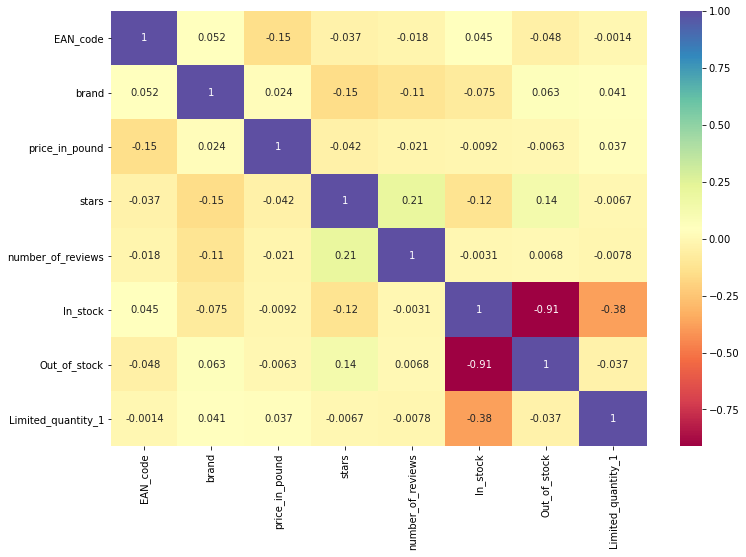

In [169]:
# visualize the linear correlations between all numeric variables
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='Spectral');

<AxesSubplot:xlabel='In_stock,Out_of_stock,Limited_quantity_1'>

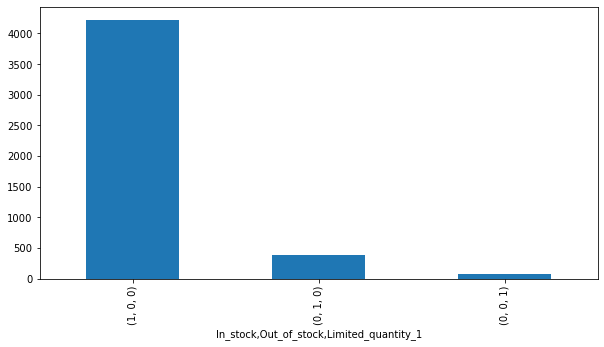

In [188]:
# visualize the avaliblity of the product
plt.figure(figsize=(10,5))
data[['In_stock','Out_of_stock','Limited_quantity_1']].value_counts().plott(kind='bar')

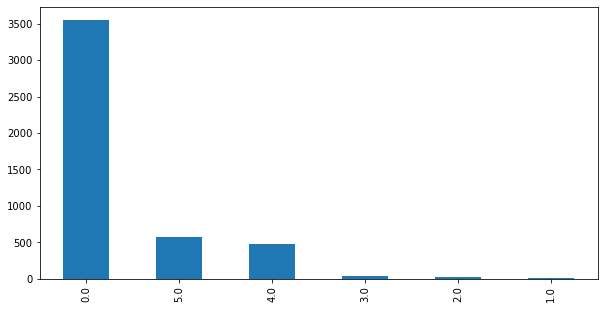

In [171]:
#visualize Stars feature
plt.figure(figsize=(10,5))
data.stars.value_counts().plot(kind='bar');

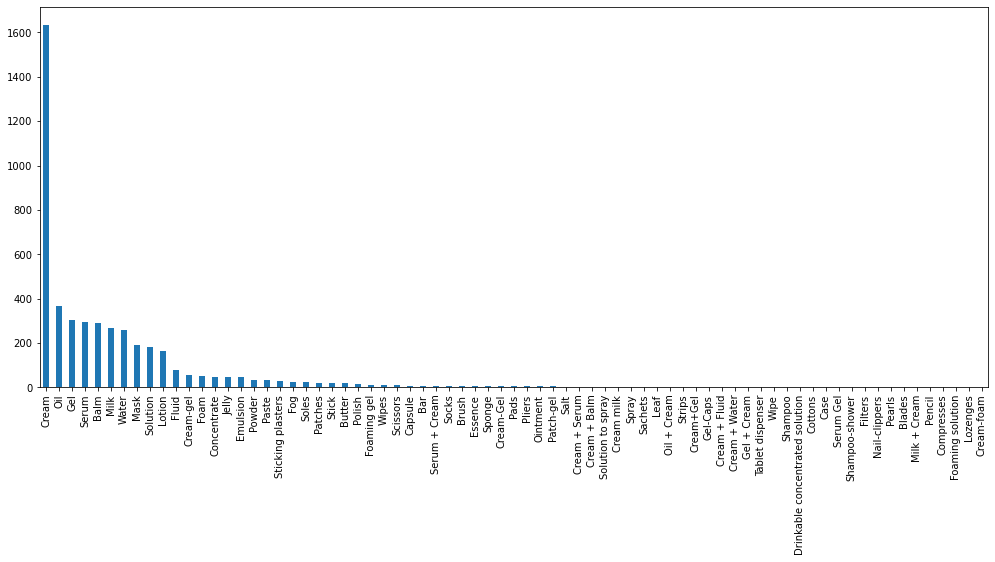

In [172]:
#visualize Form feature

plt.figure(figsize=(17,7))
data.form.value_counts().plot(kind='bar');

## Build Recommendation system

### Content-Based Recommender Systems

- We are going to make recommendations becuase our dataset doesn't contain a user id, so we have to use a content-based recommender system based on an items features and how similar they are to other. 

#### Nearest Neighbors Algorithm

In [173]:
data.head()

,name,EAN_code,brand,price_in_pound,stars,number_of_reviews,form,size,description,In_stock,Out_of_stock,Limited_quantity_1
0,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,3401326306048,0,19.90,4.0,505,Cream,2 x 500ml,Bioderma Atoderm Ultra Nourishing Cream 2 x 50...,1,0,0
1,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,3401399371684,0,4.99,4.0,396,Balm,3 sticks of 4g,Bioderma Atoderm Ultra-Moisturising Lipsticks ...,1,0,0
2,Bioderma Sébium Purifying Cleansing Foaming Ge...,3401526010868,0,11.40,4.0,144,Foaming gel,2 x 200ml,Bioderma Sébium Purifying Cleansing Foaming Ge...,1,0,0
3,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,4005808706716,1,7.80,4.0,116,Cream,2 tubes of 75 ml,Eucerin UreaRepair PLUS 5% Urea Repairing Hand...,1,0,0
4,Eucerin Complete Repair Emollient Lotion 10% U...,4005900258106,1,25.80,4.0,84,Milk,2 x 400ml,Eucerin Complete Repair Emollient Lotion 10% U...,1,0,0


In [174]:
test_point = [6,16,4,103]

# we can create a test data point to represent our shoppers description
# The shoppers description is: (brand-6, price_in_pound-16,stars-4, number_of_reviews-103)
X_1 = data.iloc[:, [2,3, 4,5]].values
y_1 = data.stars
X_1[0:5]

array([[  0.  ,  19.9 ,   4.  , 505.  ],
       [  0.  ,   4.99,   4.  , 396.  ],
       [  0.  ,  11.4 ,   4.  , 144.  ],
       [  1.  ,   7.8 ,   4.  , 116.  ],
       [  1.  ,  25.8 ,   4.  ,  84.  ]])

In [175]:
# build a nearest neighbor object, we are searching for just one neighbor so n_neighbors=1
nn = NearestNeighbors(n_neighbors=1).fit(X_1)
# kneighbors returns the neighbor for the test_point
print(nn.kneighbors([test_point]))
# Here the first array represents the length from this test_point to its closest neighbor
# The second datapoint returns the index of this neighbor

(array([[1.3453624]]), array([[11]]))


In [176]:
data.iloc[11]

name                  La Roche-Posay Effaclar Purifying Foaming Gel ...
EAN_code                                                  3433425003245
brand                                                                 5
price_in_pound                                                     16.9
stars                                                                 4
number_of_reviews                                                   103
form                                                        Foaming gel
size                                                          2 x 400ml
description           La Roche-Posay Effaclar Purifying Foaming Gel ...
In_stock                                                              1
Out_of_stock                                                          0
Limited_quantity_1                                                    0
Name: 11, dtype: object

#### KNeighborsClassifier Algorithm

In [177]:
test_point = [30,10,90]

# we can create a test data point to represent our shoppers description
# The shoppers description is: (brand-30, price_in_pound-10, number_of_reviews-90)
X = data.iloc[:, [2,3,5]].values
y = data.stars
X[0:5]

array([[  0.  ,  19.9 , 505.  ],
       [  0.  ,   4.99, 396.  ],
       [  0.  ,  11.4 , 144.  ],
       [  1.  ,   7.8 , 116.  ],
       [  1.  ,  25.8 ,  84.  ]])

In [178]:
# build a KNeighborsClassifier object, we are searching for just one neighbor so n_neighbors=1
nn = KNeighborsClassifier(n_neighbors=1).fit(X,y)

# KNeighborsClassifier returns the neighbor for the test_point
print(nn.kneighbors([test_point]))
# Here the first array represents the length from this test_point to its closest neighbor
# The second datapoint returns the index of this neighbor

(array([[24.75641533]]), array([[26]]))


In [179]:
data.iloc[26]

name                                       Filorga Cleansing Foam 150ml
EAN_code                                                  3401399693984
brand                                                                 6
price_in_pound                                                    15.99
stars                                                                 4
number_of_reviews                                                    89
form                                                           Solution
size                                                              150ml
description           Filorga Cleansing Foam gently cleanses and per...
In_stock                                                              1
Out_of_stock                                                          0
Limited_quantity_1                                                    0
Name: 26, dtype: object

## Evaluation-and-Conceptual-Understanding

#### KNeighborsClassifier Algorithm

In [180]:
LogReg = LogisticRegression()
LogReg.fit(X, y)

LogisticRegression()

In [181]:
y_pred = LogReg.predict(X)

In [182]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3551
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00        18
         3.0       0.00      0.00      0.00        37
         4.0       0.76      0.55      0.64       480
         5.0       0.64      0.86      0.74       576

    accuracy                           0.92      4670
   macro avg       0.40      0.40      0.40      4670
weighted avg       0.92      0.92      0.92      4670



#### Nearest Neighbors Algorithm

In [183]:
LogReg = LogisticRegression()
LogReg.fit(X_1, y_1)

LogisticRegression()

In [184]:
y_pred = LogReg.predict(X_1)

In [185]:
print(classification_report(y_1, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3551
         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00        18
         3.0       0.17      0.03      0.05        37
         4.0       0.79      0.62      0.69       480
         5.0       0.73      0.93      0.82       576

    accuracy                           0.94      4670
   macro avg       0.45      0.43      0.43      4670
weighted avg       0.93      0.94      0.93      4670



# Conclusion

In this project, we worked on the Cococenter pharmacy dataset, an interesting data hosted by Kaggle. In which, we tried to build a recommendation system by using given features that describe the products. To do that, we performed the following essential steps:
- Cleaning the data (to deal with wrong data).
- EDA and Data Visualization (to understand the data and the relationships in it).
- Preprocessing the data, and Building the recommendation system.
- Evaluating the recommendation system.

To solve this problem, we used three features which are (Brand, Price, and number of reviews) to build this system, and we chose them to make good suggestions. In conclusion, we were able to build a recommendation system that can recommend similar products by using Content-Based. And we used a suitable algorithm that helped to get good results which are NearestNeighborsClassifier and KNeighborsClassifier with n=1 for both. In the end, the evaluation applied for those algorithms by using the LogisticRegression model and the accuracy for both algorithm above 90%.